# Presentation Charts

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import nltk
import re
import string

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("poplyricscleaned.csv")

In [4]:
df['cleaned_lyrics'] = df['cleaned_lyrics'].astype('string')

In [5]:
df['decade'].value_counts()

decade
2010s    17921
2000s    17153
1990s     6319
2020      3328
1980s     2130
1970s     1176
Name: count, dtype: int64

In [8]:
pop_70s = df[df['decade'] == '1970s']
pop_80s = df[df['decade'] == '1980s']
pop_90s = df[df['decade'] == '1990s']
pop_00s = df[df['decade'] == '2000s']
pop_10s = df[df['decade'] == '2010s']
pop_20s = df[df['decade'] == '2020']

## Song Attributes by Decade

For this section, I am creating more charts for use in my presentation about the distribution of attributes across the decades within the pop genre. I will use groupby functions to look at the decades. 

In [9]:
loudness = df.groupby('decade')['loudness'].mean()

In [10]:
loudness

decade
1970s   -12.414776
1980s   -11.461813
1990s    -9.846405
2000s    -7.902249
2010s    -7.917794
2020     -8.092210
Name: loudness, dtype: float64

#### Scatter Plot for Energy vs. Loudness

First, I created a scatter plot of the Energy vs. Loudness attributes, to see how these interact. I changed the hue for each point to correspond with the decade, so that it could be seen for any differences over time.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

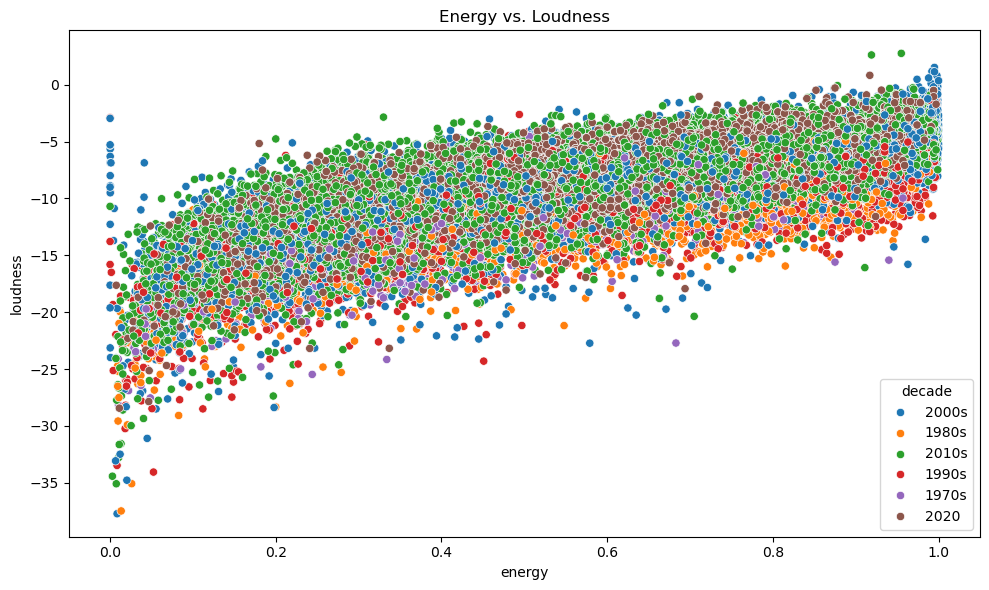

In [12]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=df, x='energy', y='loudness', hue='decade', legend=True)
plt.title('Energy vs. Loudness')

plt.tight_layout()

#### Horizontal Bar Chart for Songs in Each Decade

Next, I wanted to create a simple horizontal bar chart to display how many songs were in each decase in this final subsection of the dataset. In my presentation, I will also have a slide about the total number of songs after cleaning and merging the datasets.

In [13]:
decades = df.groupby('decade')['title'].count()

In [14]:
df_decades = decades.to_frame().reset_index()

In [15]:
df_decades

,decade,title
0,1970s,1176
1,1980s,2130
2,1990s,6319
3,2000s,17153
4,2010s,17921
5,2020,3328


In [16]:
df_decades_sorted = df_decades.sort_values('decade', ascending=False)

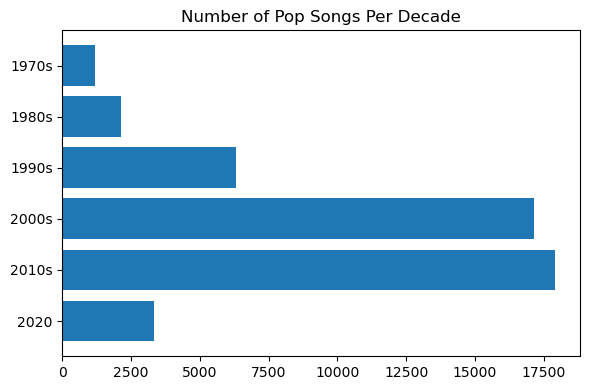

In [17]:
fig, ax = plt.subplots(figsize=(6,4))
ax.barh(df_decades_sorted["decade"], df_decades_sorted["title"])
#ax.set_xlabel('Number of Tracks')
#ax.set_ylabel('Album')
ax.set_title('Number of Pop Songs Per Decade')

plt.tight_layout()

#### Line Chart for Song Attributes for Each Decade

Next, I wanted to create a line chart that could display the average song attribute for each decade. Several of the attributes are on a scale from 0 to 1.0, so I wanted to display them together on the same axes. I used groupby functions to create the average for each decade in the attributes I wanted to display and created multiple lines on the same axes.

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,48027.0,2006.845504,10.412701,1970.00000,2001.000000,2008.000000,2015.0000,2020.000
danceability,48027.0,0.527286,0.159672,0.00000,0.421000,0.536000,0.6400,0.986
energy,48027.0,0.612054,0.249363,0.00002,0.423000,0.640000,0.8270,1.000
key,48027.0,5.250109,3.553664,0.00000,2.000000,5.000000,8.0000,11.000
loudness,48027.0,-8.445370,3.894679,-37.72600,-10.555000,-7.645000,-5.6150,2.766
mode,48027.0,0.689945,0.462521,0.00000,0.000000,1.000000,1.0000,1.000
speechiness,48027.0,0.063307,0.069310,0.00000,0.032000,0.040400,0.0627,0.966
acousticness,48027.0,0.289846,0.322266,0.00000,0.011600,0.134000,0.5490,0.996
instrumentalness,48027.0,0.103384,0.233105,0.00000,0.000002,0.000313,0.0334,0.997
liveness,48027.0,0.181554,0.142824,0.00000,0.097000,0.123000,0.2220,0.998


In [19]:
df.groupby('decade')['tempo'].mean()

decade
1970s    121.374019
1980s    123.753620
1990s    121.430225
2000s    122.670373
2010s    122.144536
2020     120.914112
Name: tempo, dtype: float64

In [20]:
df_danceability = df.groupby('decade')['danceability'].mean().reset_index(name = 'danceability')

In [21]:
df_energy = df.groupby('decade')['energy'].mean().reset_index(name = 'energy')

In [22]:
df.groupby('decade')['key'].mean()

decade
1970s    4.977041
1980s    5.407981
1990s    5.309384
2000s    5.260771
2010s    5.220914
2020     5.235276
Name: key, dtype: float64

In [23]:
df.groupby('decade')['loudness'].mean()

decade
1970s   -12.414776
1980s   -11.461813
1990s    -9.846405
2000s    -7.902249
2010s    -7.917794
2020     -8.092210
Name: loudness, dtype: float64

In [24]:
df_speechiness = df.groupby('decade')['speechiness'].mean().reset_index(name = 'speechiness')

In [25]:
df_acousticness = df.groupby('decade')['acousticness'].mean().reset_index(name = 'acousticness')

In [26]:
df_instrumentalness = df.groupby('decade')['instrumentalness'].mean().reset_index(name = 'instrumentalness')

In [27]:
df_liveness = df.groupby('decade')['liveness'].mean().reset_index(name = 'liveness')

In [28]:
df_valence = df.groupby('decade')['valence'].mean().reset_index(name = 'valence')

In [29]:
df.groupby('decade')['duration_ms'].mean()

decade
1970s    231198.921769
1980s    235547.688263
1990s    243512.555626
2000s    238785.886842
2010s    229783.393337
2020     205979.524339
Name: duration_ms, dtype: float64

In [30]:
df.groupby('decade')['time_signature'].mean()

decade
1970s    3.894558
1980s    3.921127
1990s    3.888115
2000s    3.877339
2010s    3.898778
2020     3.907151
Name: time_signature, dtype: float64

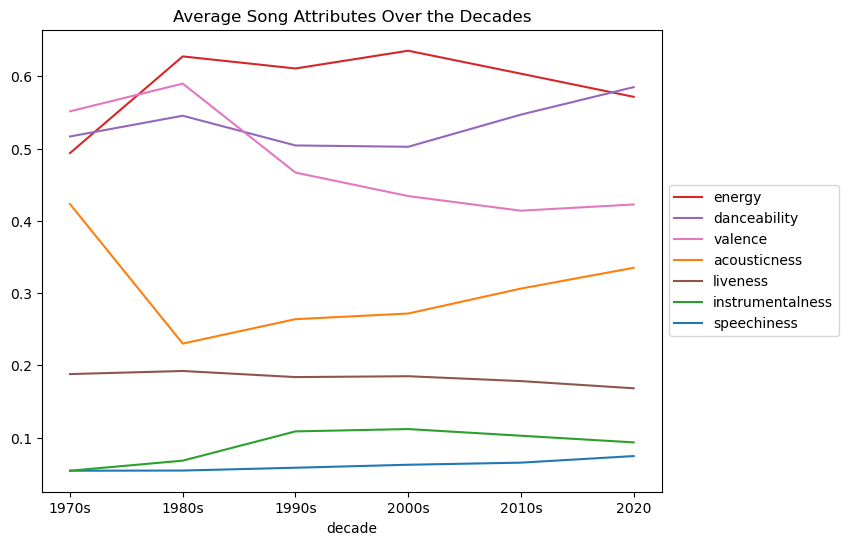

In [31]:
fig, ax = plt.subplots(figsize=(8,6))
df_speechiness.plot(kind='line', x='decade', y='speechiness', ax=ax)
df_acousticness.plot(kind='line', x='decade', y='acousticness', ax=ax)
df_instrumentalness.plot(kind='line', x='decade', y='instrumentalness', ax=ax)
df_energy.plot(kind='line', x='decade', y='energy', ax=ax)
df_danceability.plot(kind='line', x='decade', y='danceability', ax=ax)
df_liveness.plot(kind='line', x='decade', y='liveness', ax=ax)
df_valence.plot(kind='line', x='decade', y='valence', ax=ax)
ax.set_title('Average Song Attributes Over the Decades')

handles, labels = ax.get_legend_handles_labels()
order = [0, 1, 2, 3, 4, 5, 6]
order = [3, 4, 6, 1, 5, 2, 0]
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order],
          loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

For my presentation, I wanted to have more charts based on just the pop songs from the 90s, so everything below was created as part of my presentation for visuals and information.

In [33]:
df['artist'].nunique()

7025

In [35]:
df['album'].nunique()

11485

In [34]:
pop_90s['artist'].nunique()

922

In [36]:
pop_90s['album'].nunique()

1255

In [37]:
pop_90s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6319 entries, 5 to 47988
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             6319 non-null   object 
 1   artist            6319 non-null   object 
 2   tag               6319 non-null   object 
 3   year              6319 non-null   int64  
 4   lyrics            6319 non-null   object 
 5   album             6319 non-null   object 
 6   explicit          6319 non-null   bool   
 7   danceability      6319 non-null   float64
 8   energy            6319 non-null   float64
 9   key               6319 non-null   int64  
 10  loudness          6319 non-null   float64
 11  mode              6319 non-null   int64  
 12  speechiness       6319 non-null   float64
 13  acousticness      6319 non-null   float64
 14  instrumentalness  6319 non-null   float64
 15  liveness          6319 non-null   float64
 16  valence           6319 non-null   float64
 17 

In [38]:
pop_90s.head()

,title,artist,tag,year,lyrics,album,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,decade,cleaned_lyrics
5,2 Bad,michael jackson,pop,1995,"I wake up my girl, get me mad right The king ...","HIStory - PAST, PRESENT AND FUTURE - BOOK I",False,0.868,0.943,1,...,0.2490,0.0698,0.000009,0.401,0.520,103.962,289333,4.0,1990s,wake girl mad right king rock come high suck...
6,Did I Do That?,mariah carey,pop,1999,I really hope when you hear this song That yo...,Rainbow,False,0.718,0.638,11,...,0.0719,0.2310,0.000000,0.350,0.406,88.118,254600,4.0,1990s,hope hear song happy somebody new happy na n...
8,Honey,mariah carey,pop,1997,"Oh, oh, honey got me hooked on you I like tha...",Butterfly,False,0.694,0.824,1,...,0.0909,0.1190,0.000007,0.152,0.675,95.833,299827,4.0,1990s,oh oh honey get hook like oh oh come mc la d...
11,Money,michael jackson,pop,1995,Money Money Lie for it Spy for it Kill for it...,"HIStory - PAST, PRESENT AND FUTURE - BOOK I",False,0.899,0.681,10,...,0.0804,0.0320,0.000018,0.196,0.817,102.942,281800,4.0,1990s,money money lie spy kill die trust devil ...
12,She Drives Me Wild,michael jackson,pop,1991,"She's got the look, she's so fine And you kno...",Dangerous,False,0.906,0.930,1,...,0.2060,0.0691,0.000000,0.463,0.643,109.544,219867,4.0,1990s,get look fine know damn girl get break scene...


In [39]:
pop_90s['explicit'].value_counts()

explicit
False    6154
True      165
Name: count, dtype: int64

In [40]:
pop_90s['key'].value_counts()

key
7     868
9     807
2     774
0     750
4     641
11    460
1     419
5     419
6     340
10    336
8     322
3     183
Name: count, dtype: int64

In [41]:
pop_90s['time_signature'].value_counts()

time_signature
4.0    5593
3.0     619
5.0      59
1.0      45
0.0       3
Name: count, dtype: int64

In [42]:
pop_90s['year'].value_counts()

year
1999    1074
1997     923
1998     865
1995     677
1996     660
1994     562
1993     476
1991     441
1992     410
1990     231
Name: count, dtype: int64

years = pop_90s.groupby('year')['title'].count()

In [43]:
years = pop_90s.groupby('year')['title'].count()

In [44]:
years

year
1990     231
1991     441
1992     410
1993     476
1994     562
1995     677
1996     660
1997     923
1998     865
1999    1074
Name: title, dtype: int64

In [45]:
df_years = years.to_frame().reset_index()

In [46]:
df_years

,year,title
0,1990,231
1,1991,441
2,1992,410
3,1993,476
4,1994,562
5,1995,677
6,1996,660
7,1997,923
8,1998,865
9,1999,1074


In [48]:
df_years_sorted = df_years.sort_values('year', ascending=False)

In [55]:
df_years_sorted

,year,title
9,1999,1074
8,1998,865
7,1997,923
6,1996,660
5,1995,677
4,1994,562
3,1993,476
2,1992,410
1,1991,441
0,1990,231


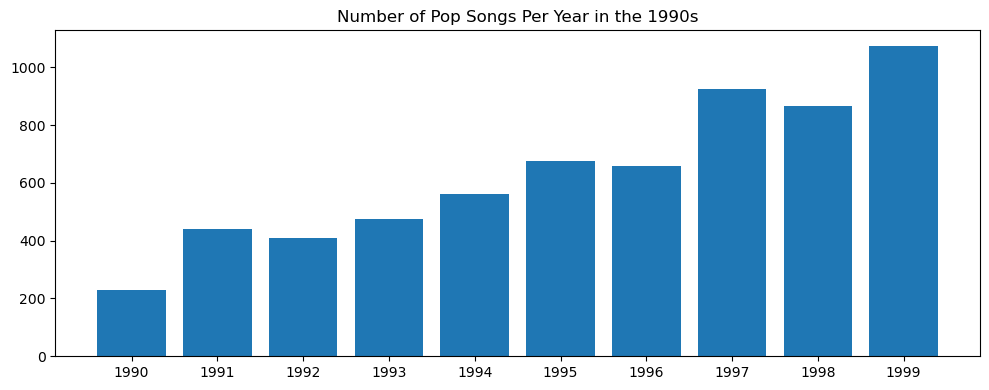

In [57]:
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(df_years_sorted["year"], df_years_sorted["title"])
#ax.set_xlabel('Number of Tracks')
#ax.set_ylabel('Album')
ax.xaxis.set_ticks(df_years_sorted["year"])
labels = df_years_sorted["year"]
ax.set_xticklabels(labels)
ax.set_title('Number of Pop Songs Per Year in the 1990s')

plt.tight_layout()